# Importing libraries

In [1469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Plotly to create interactive graph
# from plotly import tools
# from plotly.offline import init_notebook_mode,iplot
# init_notebook_mode(connected=False)
# import plotly.figure_factory as ff
# import plotly.graph_objs as go

# Loading Dataset

In [1470]:
deliveries = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
matches = pd.read_csv('IPL Matches 2008-2020.csv')

In [1471]:
deliveries.head(3)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [1472]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [1473]:
matches.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar


In [1474]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

# Data prepare

In [1475]:
deliveries.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [1476]:
deliveries.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [1477]:
matches.team1.value_counts()

Royal Challengers Bangalore    108
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Delhi Daredevils                83
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   23
Delhi Capitals                  19
Gujarat Lions                   16
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

Alter the name of teams 

In [1478]:
#Name of Rising Pune Supergiant, Delhi Capitals, Rising Pune Supergiant were changed

deliveries.batting_team.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant','Delhi Daredevils':'Delhi Capitals','Sunrisers Hyderabad':'Deccan Chargers','Pune Warriors ':'Rising Pune Supergiant'},regex=True,inplace=True)
deliveries.bowling_team.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant','Delhi Daredevils':'Delhi Capitals','Sunrisers Hyderabad':'Deccan Chargers','Pune Warriors ':'Rising Pune Supergiant'},regex=True,inplace=True)
matches.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant','Delhi Daredevils':'Delhi Capitals','Sunrisers Hyderabad':'Deccan Chargers','Pune Warriors ':'Rising Pune Supergiant'},regex=True,inplace=True)
matches.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant','Delhi Daredevils':'Delhi Capitals','Sunrisers Hyderabad':'Deccan Chargers','Pune Warriors':'Rising Pune Supergiant'},regex=True,inplace=True)
matches.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant','Delhi Daredevils':'Delhi Capitals','Sunrisers Hyderabad':'Deccan Chargers','Pune Warriors':'Rising Pune Supergiant'},regex=True,inplace=True)
matches.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant','Delhi Daredevils':'Delhi Capitals','Sunrisers Hyderabad':'Deccan Chargers','Pune Warriors':'Rising Pune Supergiant'},regex=True,inplace=True)

In [1479]:
deliveries.shape

(193468, 18)

In [1480]:
matches.shape

(816, 17)

In [1481]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [1482]:
#extracting year from date
matches['matches_year'] = matches['date'].str.extract('(\d\d\d\d)',expand=True)

In [1483]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,matches_year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


Matches in Every Season

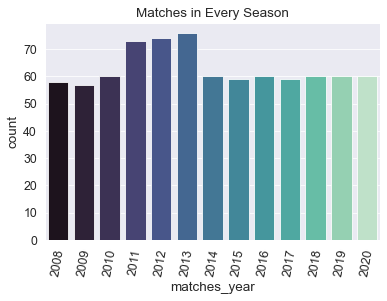

In [1618]:
sns.countplot(x='matches_year',data=matches,palette='mako')
plt.xticks(rotation=80)
plt.title('Matches in Every Season')
sns.set_context('paper',font_scale=1.5);

Matches Played vs Wins by Each Team

In [1485]:
x=matches['team1'].value_counts()
y=matches['team2'].value_counts()
all_matches = x + y
a=pd.DataFrame({'teams':all_matches.index,'total_matches':all_matches.values})
wins=matches.winner.value_counts()
b=pd.DataFrame({'teams':wins.index,'won':wins.values})
group=pd.merge(a,b,on='teams',how='inner')
group['% won']=pd.DataFrame({'% won':np.round((group['won']/group['total_matches'])*100,1)})
group

,teams,total_matches,won,% won
0,Chennai Super Kings,178,106,59.6
1,Deccan Chargers,199,95,47.7
2,Delhi Capitals,194,86,44.3
3,Gujarat Lions,30,13,43.3
4,Kings XI Punjab,190,88,46.3
5,Kochi Tuskers Kerala,14,6,42.9
6,Kolkata Knight Riders,192,99,51.6
7,Mumbai Indians,203,120,59.1
8,Rajasthan Royals,161,81,50.3
9,Rising Pune Supergiant,76,27,35.5


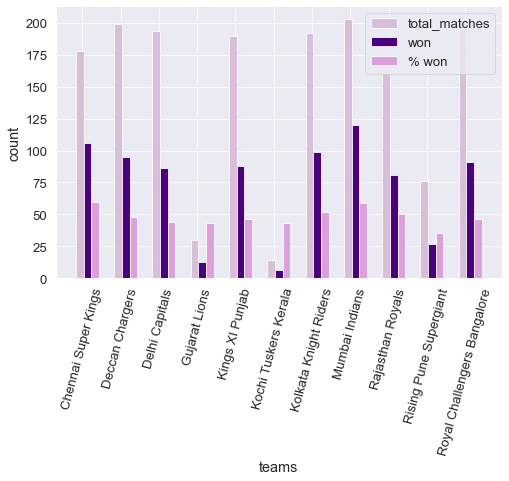

In [1619]:
plt.figure(figsize=(8,5))
x_axis=np.arange(len(group['teams']))*1.5
plt.bar(x_axis,group['total_matches'],width=0.3,label='total_matches',color='thistle')
plt.bar(x_axis+0.30,group['won'],width=0.3,label='won',color='indigo')
plt.bar(x_axis+0.6,group['% won'],width=0.3,label='% won',color='plum')
plt.xticks(x_axis+0.1,group['teams'],rotation=75)
plt.legend()
plt.xlabel('teams')
plt.ylabel('count')
sns.set_context('paper',font_scale=1.5);

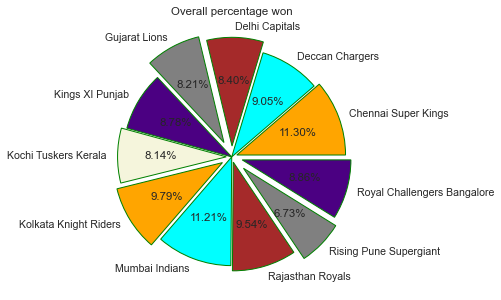

In [1628]:
colors = ( "orange", "cyan", "brown","grey", "indigo", "beige")
explode = (0.05, 0.0, 0.1, 0.15, 0.0, 0.05,0.1, 0.0, 0.05, 0.15, 0.1)
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
ax=plt.subplots(figsize=(7,5))
plt.pie(group['% won'],autopct='%1.2f%%',radius=1,labels=group['teams'],
        colors=colors,wedgeprops = wp,explode=explode)
plt.title('Overall percentage won')
sns.set_context('paper',font_scale=1.2);

Venue of Most Matches

In [1488]:
grounds= matches.groupby('venue').count()[['id']].reset_index()

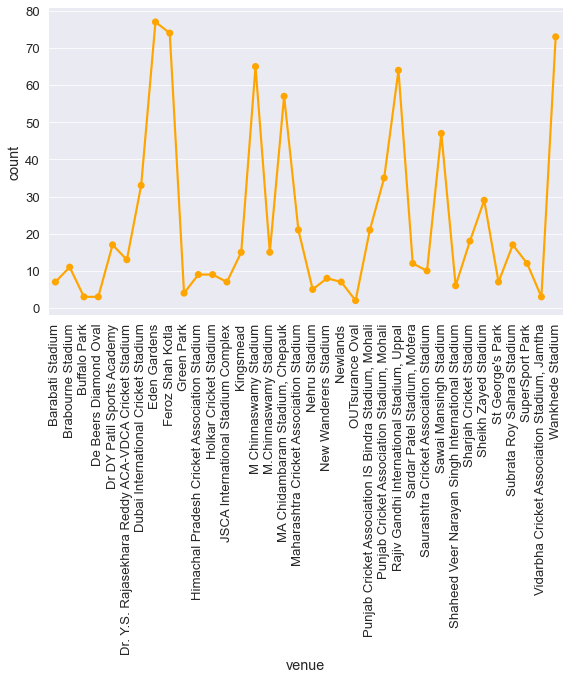

In [1634]:
sns.catplot(y=grounds['id'],x=grounds['venue'],data=grounds,dodge=True,aspect=2,kind='point',color='orange')
plt.xticks(rotation=90)
plt.ylabel('count')
sns.set_context('paper',font_scale=1.3);

Umpires matches count

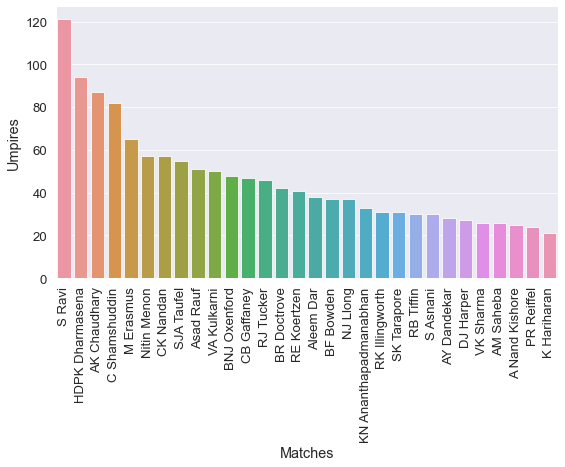

In [1490]:
plt.figure(figsize=(9,5))
umpire=pd.concat([matches['umpire1'],matches['umpire2']],axis=0).value_counts().head(30)
sns.barplot(x=umpire.index,y=umpire.values)
plt.xticks(rotation=90)
plt.ylabel('Umpires')
plt.xlabel('Matches')
sns.set_context('paper',font_scale=1.5);

Teams toss won

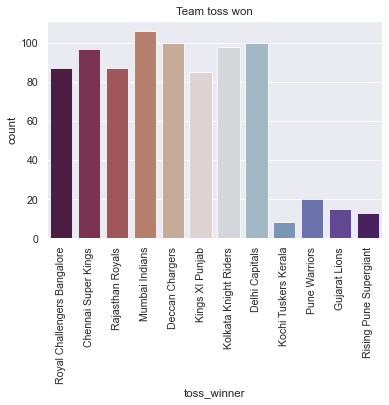

In [1637]:
matches['toss_winner'].value_counts()
sns.countplot(matches['toss_winner'],palette='twilight_shifted_r')
plt.xticks(rotation=90)
sns.set_context('paper',font_scale=1.2)
plt.title('Team toss won');

Won the toss and the match

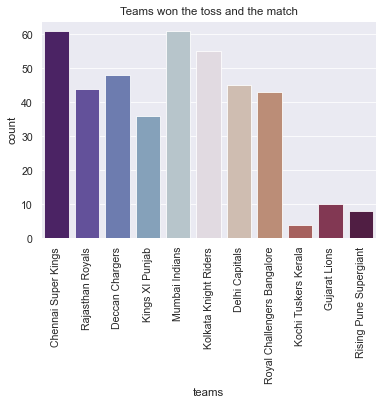

In [1492]:
df=pd.DataFrame(matches[matches['toss_winner']==matches['winner']])
sns.countplot(df['toss_winner'],palette='twilight_shifted')
plt.xticks(rotation=90)
plt.xlabel('teams')
plt.title('Teams won the toss and the match')
sns.set_context('paper',font_scale=1.2);

Most likely decision after winning toss 

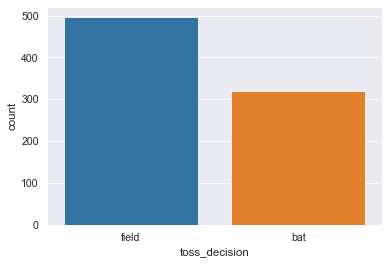

In [1638]:
sns.countplot(matches['toss_decision'])
sns.set_context('paper',font_scale=1.4);

Total and average runs per season

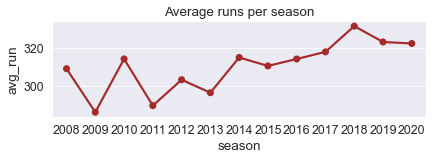

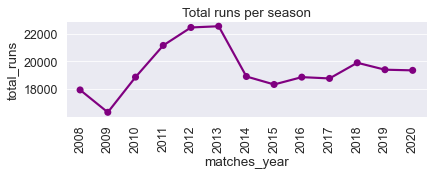

In [1639]:
run1=matches[['matches_year','id']].merge(deliveries,on='id').groupby('matches_year')['total_runs'].sum().reset_index()
total_matches = matches.groupby('matches_year')['id'].count().reset_index()
avg_runs = pd.DataFrame({'season':run1['matches_year'],'avg_run':run1['total_runs']/total_matches['id']})

sns.catplot(x='season',y='avg_run',data=avg_runs,kind='point',color='brown',aspect=3,height=2)
plt.title('Average runs per season')
sns.catplot(x=run1['matches_year'],y=run1['total_runs'],data=run1,kind='point',color='purple',aspect=3,height=2,labels='total_runs')
plt.xticks(rotation=90)
sns.set_style('darkgrid')
plt.title('Total runs per season')
sns.set_context('paper',font_scale=1.1);

Four's and sixes hit every season

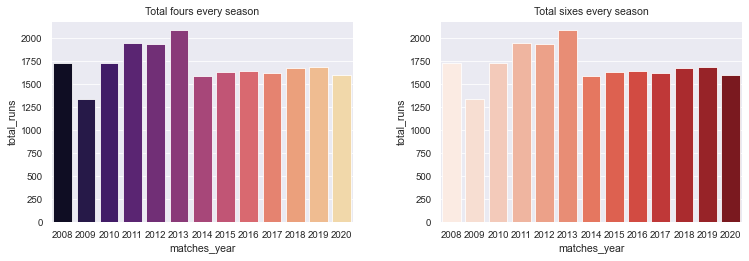

In [1495]:
df=pd.DataFrame(matches[['matches_year','id']].merge(deliveries,on='id'))
c=df.groupby('total_runs')

fours=c.get_group(4)
four_runs=fours.groupby('matches_year')['total_runs'].count().reset_index()

a=plt.figure()
a.add_axes([0,0,0.7,0.7])
sns.barplot(x='matches_year',y='total_runs',data=four_runs,palette='magma')
plt.title('Total fours every season')

a.add_axes([0.9,0,0.7,0.7])
sixes=c.get_group(6)
sixes_runs=fours.groupby('matches_year')['total_runs'].count().reset_index()
sns.barplot(x='matches_year',y='total_runs',data=sixes_runs,palette='Reds')
plt.title('Total sixes every season')
sns.set_context('paper',font_scale=1.2)
sns.set_style('white');

230+ Target given by Teams

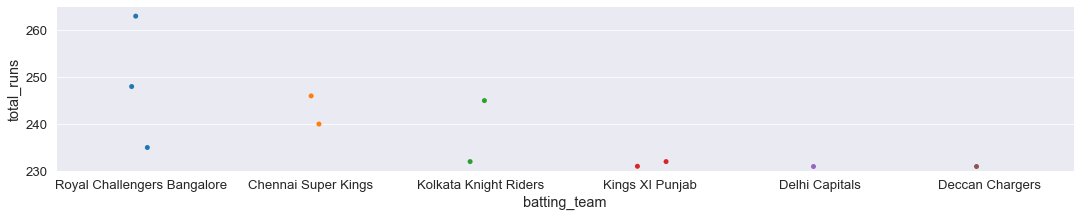

In [1654]:
most_run = deliveries.groupby(['id','batting_team','bowling_team'])['total_runs'].sum().sort_values(ascending=False).head(11).reset_index()
most_run
sns.catplot(y='total_runs',x='batting_team',data=most_run,aspect=5,height=3)
plt.ylim(230,265)
sns.set_context('paper',font_scale=1.5);

Runs Scored in Powerplay

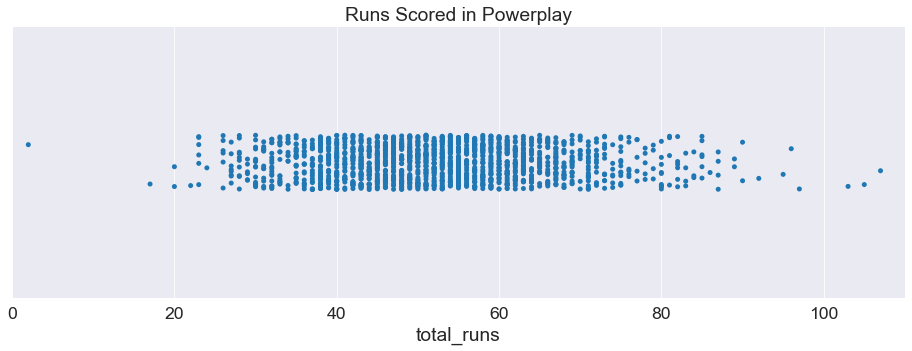

In [1664]:
plt.figure(figsize=(16,5))
s=deliveries[deliveries['over']<=6].groupby(['id','batting_team','bowling_team'])['total_runs'].sum().reset_index()
sns.stripplot(s['total_runs'])
plt.title('Runs Scored in Powerplay')
sns.set_context('paper',font_scale=2)
plt.xlim(0,110);

Number of Wickets in powerplay

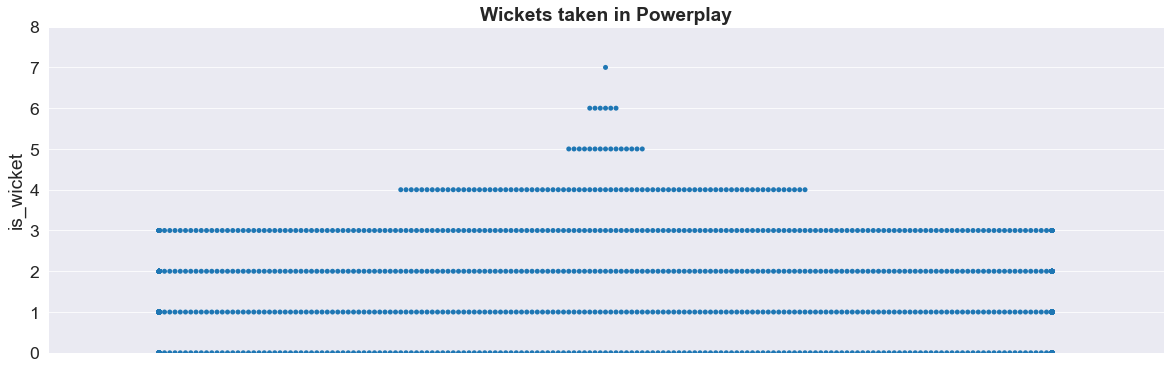

In [1666]:
plt.figure(figsize=(20,6))
s=deliveries[deliveries['over']<=6].groupby(['id','batting_team','bowling_team'])['is_wicket'].sum().reset_index()
sns.swarmplot(y=s['is_wicket'])
plt.title('Wickets taken in Powerplay',fontweight = 'bold')
sns.set_context('paper',font_scale=2)
plt.ylim(0,8);

Top 10 Batsman runs

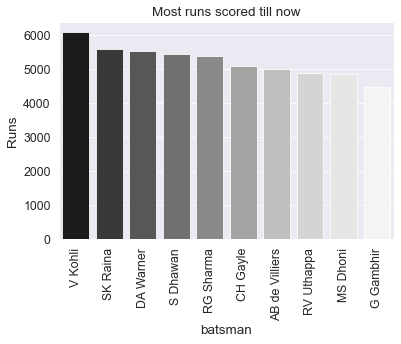

In [1617]:
batsman_runs=deliveries.groupby('batsman')['total_runs'].sum().sort_values(ascending=False).head(10)
batsman_runs
sns.barplot(x=batsman_runs.index,y=batsman_runs.values,palette='Greys_r')
plt.xticks(rotation=90)
plt.ylabel('Runs')
plt.title('Most runs scored till now')
sns.set_context('paper',font_scale=1.4);

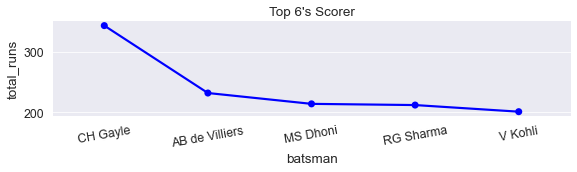

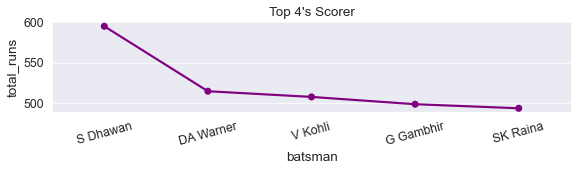

In [1614]:
sixes =pd.DataFrame(deliveries[deliveries['total_runs']==6].groupby(['batsman'])['total_runs'].count().sort_values(ascending=False).head().reset_index())
sns.catplot(x=sixes['batsman'], y=sixes['total_runs'], data=sixes,kind='point',aspect=4,height=2,color='blue')
plt.title("Top 6's Scorer")
plt.xticks(rotation=10)

fours =pd.DataFrame(deliveries[deliveries['total_runs']==4].groupby('batsman')['total_runs'].count().sort_values(ascending=False).head().reset_index())
sns.catplot(x=fours['batsman'], y=fours['total_runs'], data=fours,kind='point',aspect=4,height=2,color='purple')
plt.title("Top 4's Scorer")
sns.set_context('paper',font_scale=1.4)
plt.xticks(rotation=15);

Top 10 Wicket Taking Bowlers

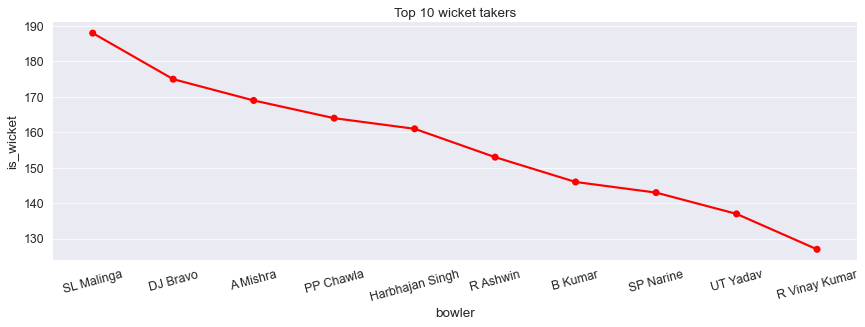

In [1608]:
wicket_taker=pd.DataFrame(deliveries.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10).reset_index())
sns.catplot(x='bowler',y='is_wicket',data=wicket_taker,aspect=3,height=4,kind='point',color='red')
plt.title('Top 10 wicket takers')
sns.set_context('paper',font_scale=1.4)
plt.xticks(rotation=15);

IPL Season winners

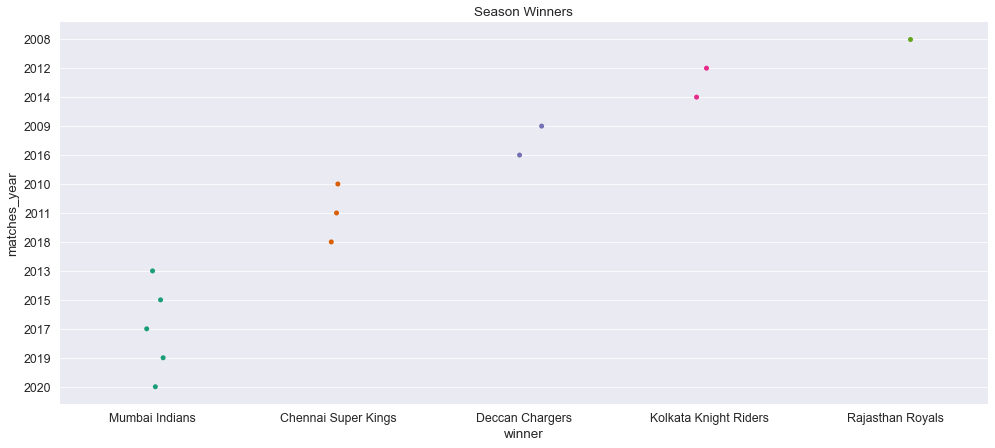

In [1602]:
last_match=matches.drop_duplicates(subset=['matches_year'],keep='last').sort_values(by='matches_year',ascending=False)
sns.catplot(x='winner',y='matches_year',data=last_match,aspect=2.3,height=6,palette='Dark2')
sns.set_style('darkgrid')
plt.title('Season Winners')
sns.set_context('paper',font_scale=1.4);

Total IPL Trophies Holder

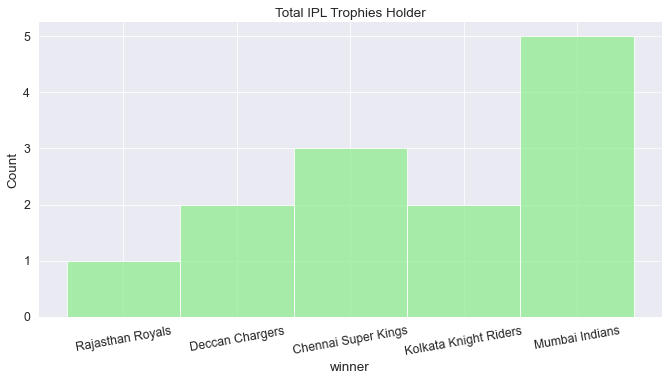

In [1581]:
last_match=matches.drop_duplicates(subset=['matches_year'],keep='last')
sns.displot(x=last_match['winner'],aspect=1.9,height=5,data=last_match,kind='hist',color='lightgreen')
plt.title('Total IPL Trophies Holder')
sns.set_context('paper',font_scale=1.2)
plt.xticks(rotation=10)
sns.set_context('paper',font_scale=1.4);

Dismissal Types

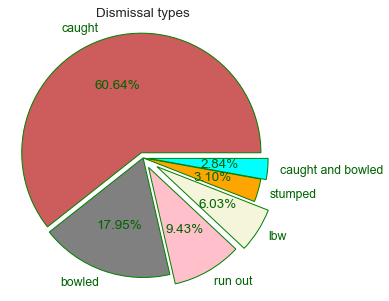

In [1607]:
colors = ( "indianred", "grey", "pink", "beige","orange", "cyan",'black')
explode = (0.05, 0.0, 0.1, 0.15, 0.0, 0.05)
wp = { 'linewidth' : 1,'edgecolor' : 'green' }
ax=plt.subplots(figsize=(7,5))
dismissal=deliveries['dismissal_kind'].value_counts().head(6)
plt.pie(dismissal,autopct='%1.2f%%',radius=1.1,labels=dismissal.index,explode=explode,colors=colors,wedgeprops = wp, textprops = dict(color ="darkgreen"))
plt.title('Dismissal types')
sns.set_context('paper',font_scale=1.4);